<a href="https://colab.research.google.com/github/MohamedAlaaEldinFarghaly/OpenCV-For-Image-Processing/blob/master/Copy_of_get_dot_or_clean_it.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

In [ ]:
uploaded = upload_files()

Saving 3.png to 3.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load image, grayscale
image = cv2.imread('3.png')
print(image.shape)
image = cv2.resize(image,(600,800),interpolation = cv2.INTER_AREA)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)[1]
first =thresh.copy()
# Filter out large non-connecting objects
cnts= cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 3:
        cv2.drawContours(thresh,[c],0,0,-1)


(542, 820, 3)


(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7ff8efea50f0>)

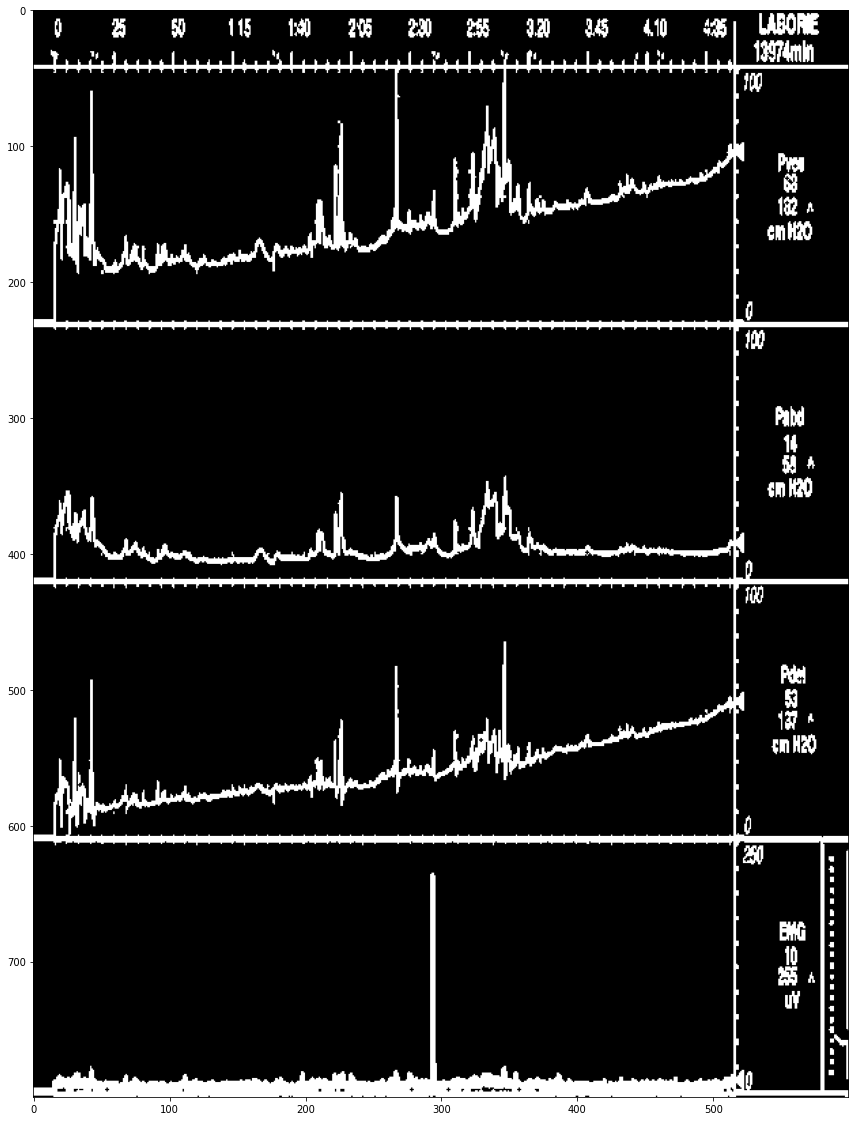

In [ ]:
plt.figure(figsize=(20,20)),plt.imshow(thresh, cmap= 'gray')

In [ ]:
fin = cv2.bitwise_and(image, image, mask = thresh)
cv2.imwrite("Masked image.jpg", fin)

True